<a href="https://colab.research.google.com/github/Mega-737/Challenge-TelecomX-Parte-2-Prevendo-Churn/blob/main/Challenge_Telecom_X_An%C3%A1lise_de_Evas%C3%A3o_de_Clientes_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORMAÇÃO: Estatística e Machine Learning G8 - ONEAlura

`CHALLENGE TELECOM X: ANÁLISE DE EVASÃO DE CLIENTES - PARTE 2`

💡 **SOBRE O DESAFIO** 💡

  `PREVENDO CHURN`

# 🛠️ PREPARAÇÃO DOS DADOS

## 1. Extração e Transformação dos Dados

- Importar as bibliotecas
- Carregar os dados diretamente da API utilizando Python. Diretamente do GitHub
- Validar e converter os dados para um DataFrame do Pandas para facilitar a manipulação.
- Duplicar o banco de dados: df_original e df_trabalho
- Reconhecimento do Dataset: Estrutura e Colunas
- Verificar total de colunas, linhas e nomes, visualizar dimensões
- Padronizar todas as colunas para MAIÚSCULAS
- Exclusão das colunas que não participarão da análise de dados: CUSTOMERID,  ACCOUNT.PAPERLESSBILLING, ACCOUNT.PAYMENTMETHOD, INTERNET.INTERNETSERVICE
-  Tratamento de Inconsistências: valores ausentes, duplicados, erros de formatação e inconsistências nas categorias.
- Print teste em planilha em Tabulate.

In [ ]:
# 1. IMPORTAÇÃO DAS BIBLIOTECAS ESSENCIAIS
import pandas as pd
import requests
import json
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from google.colab import files
import numpy as np

# IGNORAR MENSAGENS DE AVISO
warnings.filterwarnings("ignore")

# 2. CARREGAR OS DADOS DIRETAMENTE DO GITHUB
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# FAZER DOWNLOAD DO ARQUIVO JSON
response = requests.get(url)
data_json = response.json()

# 3. CONVERTER PARA DATAFRAME NORMALIZANDO COLUNAS ANINHADAS
df_original = pd.json_normalize(data_json)

# 4. CRIAR UMA CÓPIA DE TRABALHO
df_trabalho = df_original.copy()

# 5. EXPLORAÇÃO INICIAL DOS DADOS
print("INFORMAÇÕES INICIAIS DO DATASET:")
print(f"Total de linhas: {df_trabalho.shape[0]}")
print(f"Total de colunas: {df_trabalho.shape[1]}")
print(f"Colunas:\n{df_trabalho.columns.tolist()}")

# 6. PADRONIZAR NOMES DAS COLUNAS PARA LETRAS MAIÚSCULAS
df_trabalho.columns = df_trabalho.columns.str.upper()

# 7. EXCLUSÃO DE COLUNAS IRRELEVANTES PARA A ANÁLISE
colunas_excluir = ['CUSTOMERID', 'ACCOUNT.PAPERLESSBILLING', 'ACCOUNT.PAYMENTMETHOD', 'INTERNET.INTERNETSERVICE']
df_trabalho.drop(columns=colunas_excluir, inplace=True)

# 8. TRATAMENTO DE VALORES AUSENTES
print("\nVALORES AUSENTES POR COLUNA:")
print(df_trabalho.isnull().sum())

# 9. REMOVER LINHAS COM 'CHURN' VAZIO
df_trabalho = df_trabalho[df_trabalho['CHURN'].notna()]

# 10. CONVERTER VALORES NUMÉRICOS EM 'ACCOUNT.CHARGES.TOTAL'
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = pd.to_numeric(df_trabalho['ACCOUNT.CHARGES.TOTAL'], errors='coerce')

# 11. REMOVER DUPLICATAS (SE HOUVER)
df_trabalho.drop_duplicates(inplace=True)

# 12. FORMATAR E EXIBIR AMOSTRA DOS DADOS EM TABELA (TABULATE)
print("\nAMOSTRA DOS DADOS TRATADOS (TABULATE):")
print(tabulate(df_trabalho.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))

INFORMAÇÕES INICIAIS DO DATASET:
Total de linhas: 7267
Total de colunas: 21
Colunas:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

VALORES AUSENTES POR COLUNA:
CHURN                        0
CUSTOMER.GENDER              0
CUSTOMER.SENIORCITIZEN       0
CUSTOMER.PARTNER             0
CUSTOMER.DEPENDENTS          0
CUSTOMER.TENURE              0
PHONE.PHONESERVICE           0
PHONE.MULTIPLELINES          0
INTERNET.ONLINESECURITY      0
INTERNET.ONLINEBACKUP        0
INTERNET.DEVICEPROTECTION    0
INTERNET.TECHSUPPORT         0
INTERNET.STREAMINGTV       

## 2. Econding

`Utilizado o método de codificação ONE-HOT ENCODING. `

- No internet service" e "No phone service" foram padronizados para "No".
-Os dados são apresentados de forma organizada e estruturada com tabulate.
-A variável CHURN não foi codificada para poder ser usada como variável alvo posteriormente.

In [ ]:
# 1. IMPORTAÇÃO DE FERRAMENTAS
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from tabulate import tabulate

# 2. CÓPIA DO DATAFRAME ORIGINAL
df_encoded = df_trabalho.copy()

# 3. SUBSTITUIR 'No phone service' e 'No internet service' POR 'No'
colunas_substituir = [
    'PHONE.MULTIPLELINES',
    'INTERNET.ONLINESECURITY',
    'INTERNET.ONLINEBACKUP',
    'INTERNET.DEVICEPROTECTION',
    'INTERNET.TECHSUPPORT',
    'INTERNET.STREAMINGTV',
    'INTERNET.STREAMINGMOVIES'
]
for coluna in colunas_substituir:
    df_encoded[coluna] = df_encoded[coluna].replace(['No phone service', 'No internet service'], 'No')

# 4. CONVERSÃO DA COLUNA CHURN PARA BINÁRIO (1 = Cliente.Evasão, 0 = Cliente.Ativo)
df_encoded['CHURN'] = df_encoded['CHURN'].replace({
    'Cliente.Churn/Evasão': 1,
    'Cliente.Churn': 1,
    'Cliente.Evasão': 1,
    'Churn': 1,
    'No': 1,
    'Não': 1,
    'Cliente.Ativo': 0,
    'Ativo': 0,
    'Yes': 0,
    'Sim': 0
})

# Converter para tipo numérico com segurança
df_encoded['CHURN'] = pd.to_numeric(df_encoded['CHURN'], errors='coerce')

# 5. TRATAMENTO DE VARIÁVEIS NUMÉRICAS (CONVERSÃO + IMPUTAÇÃO DE VALORES AUSENTES)
colunas_numericas = ['CUSTOMER.TENURE', 'ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']
for col in colunas_numericas:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

imputador = SimpleImputer(strategy='median')
df_encoded['ACCOUNT.CHARGES.TOTAL'] = imputador.fit_transform(df_encoded[['ACCOUNT.CHARGES.TOTAL']])

# 6. IDENTIFICAR VARIÁVEIS CATEGÓRICAS (EXCLUINDO CHURN)
variaveis_categoricas = df_encoded.select_dtypes(include='object').columns.tolist()
if 'CHURN' in variaveis_categoricas:
    variaveis_categoricas.remove('CHURN')

# 7. ONE-HOT ENCODING
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
dados_codificados = encoder.fit_transform(df_encoded[variaveis_categoricas])
nomes_colunas = encoder.get_feature_names_out(variaveis_categoricas)
df_onehot = pd.DataFrame(dados_codificados, columns=nomes_colunas)

# 8. CONCATENAR O DATAFRAME ENCODADO
df_encoded.reset_index(drop=True, inplace=True)
df_onehot.reset_index(drop=True, inplace=True)
df_trabalho_encoded = pd.concat([df_encoded.drop(columns=variaveis_categoricas), df_onehot], axis=1)

# 9. GARANTIR QUE TODO O DATAFRAME ESTEJA NUMÉRICO
df_trabalho_encoded = df_trabalho_encoded.apply(pd.to_numeric)

# 10. VISUALIZAÇÃO FINAL
print("✅ FORMATO FINAL DO DATAFRAME PRONTO PARA SMOTE E MODELAGEM:")
print(f"Linhas: {df_trabalho_encoded.shape[0]}")
print(f"Colunas: {df_trabalho_encoded.shape[1]}")
print("\n🔎 AMOSTRA DOS DADOS TRANSFORMADOS:")
print(tabulate(df_trabalho_encoded.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


✅ FORMATO FINAL DO DATAFRAME PRONTO PARA SMOTE E MODELAGEM:
Linhas: 7218
Colunas: 30

🔎 AMOSTRA DOS DADOS TRANSFORMADOS:
╒═════════╤══════════════════════════╤═══════════════════╤═══════════════════════════╤═════════════════════════╤══════════════════════════╤════════════════════════╤═══════════════════════╤════════════════════════╤══════════════════════════╤═══════════════════════════╤═════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════╤══════════════════════════════╤═══════════════════════════════╤════════════════════════════╤═════════════════════════════╤════════════════════════════════╤═════════════════════════════════╤═══════════════════════════╤════════════════════════════╤═══════════════════════════╤════════════════════════════╤═══════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════╤═════════════════════════════╕
│   CHURN │   CUSTOMER.SENIORCITIZEN │

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Substituição de serviços ausentes
colunas_substituir = [
    'PHONE.MULTIPLELINES',
    'INTERNET.ONLINESECURITY',
    'INTERNET.ONLINEBACKUP',
    'INTERNET.DEVICEPROTECTION',
    'INTERNET.TECHSUPPORT',
    'INTERNET.STREAMINGTV',
    'INTERNET.STREAMINGMOVIES'
]
for coluna in colunas_substituir:
    df_trabalho[coluna] = df_trabalho[coluna].replace(['No phone service', 'No internet service'], 'No')

# Correção da variável CHURN
df_trabalho['CHURN'] = df_trabalho['CHURN'].replace({
    'Cliente.Churn/Evasão': 1,
    'Cliente.Ativo': 0,
    'Cliente.Churn': 1,
    'Cliente.Ativo ': 0,
    'Yes': 0,
    'No': 1
}).astype('Int64')

# Conversão de colunas numéricas
colunas_numericas = ['CUSTOMER.TENURE', 'ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']
for col in colunas_numericas:
    df_trabalho[col] = pd.to_numeric(df_trabalho[col], errors='coerce')

# Imputar valores ausentes
imputador = SimpleImputer(strategy='median')
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = imputador.fit_transform(df_trabalho[['ACCOUNT.CHARGES.TOTAL']])

# Encoding das variáveis categóricas
variaveis_categoricas = df_trabalho.select_dtypes(include='object').columns.tolist()
if 'CHURN' in variaveis_categoricas:
    variaveis_categoricas.remove('CHURN')

encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
dados_codificados = encoder.fit_transform(df_trabalho[variaveis_categoricas])
nomes_colunas = encoder.get_feature_names_out(variaveis_categoricas)
df_onehot = pd.DataFrame(dados_codificados, columns=nomes_colunas)

# Unir dados codificados ao dataframe principal
df_trabalho.reset_index(drop=True, inplace=True)
df_onehot.reset_index(drop=True, inplace=True)
df_trabalho_encoded = pd.concat([df_trabalho.drop(columns=variaveis_categoricas), df_onehot], axis=1)
df_trabalho_encoded = df_trabalho_encoded.apply(pd.to_numeric)

# Validação
df_trabalho_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CHURN                            6994 non-null   Int64  
 1   CUSTOMER.SENIORCITIZEN           6994 non-null   int64  
 2   CUSTOMER.TENURE                  6994 non-null   int64  
 3   ACCOUNT.CHARGES.MONTHLY          6994 non-null   float64
 4   ACCOUNT.CHARGES.TOTAL            6994 non-null   float64
 5   CUSTOMER.GENDER_Female           6994 non-null   float64
 6   CUSTOMER.GENDER_Male             6994 non-null   float64
 7   CUSTOMER.PARTNER_No              6994 non-null   float64
 8   CUSTOMER.PARTNER_Yes             6994 non-null   float64
 9   CUSTOMER.DEPENDENTS_No           6994 non-null   float64
 10  CUSTOMER.DEPENDENTS_Yes          6994 non-null   float64
 11  PHONE.PHONESERVICE_No            6994 non-null   float64
 12  PHONE.PHONESERVICE_Y

## 3. Verificação Da Proporção De Evasão

`3.1.1. Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos.`

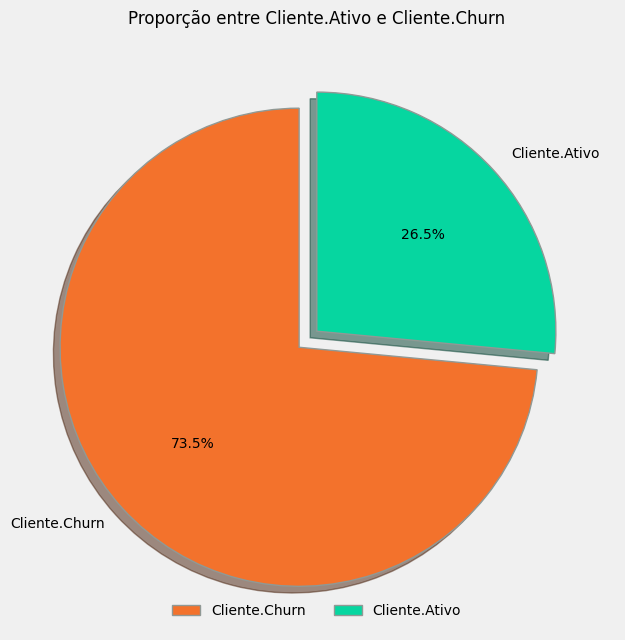

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------ CONFIGURAÇÃO GLOBAL DOS GRÁFICOS ------------------------
titulo_tamanho = 12
legenda_tamanho = 10

cores = {
    'urgente': {'cor': '#D90429', 'min': 91, 'max': 100},
    'alto_risco': {'cor': '#EF233C', 'min': 76, 'max': 90},
    'perigo': {'cor': '#F3722C', 'min': 61, 'max': 75},
    'atenção': {'cor': '#F8961E', 'min': 46, 'max': 60},
    'baixo_risco': {'cor': '#06D6A0', 'min': 16, 'max': 45},
    'neutro': {'cor': '#118AB2', 'min': 0, 'max': 15},
    'texto': {'cor': '#264653'}
}

def obter_cor_por_porcentagem(porcentagem):
    for nivel, info in cores.items():
        if info['min'] <= porcentagem <= info['max']:
            return info['cor']
    if porcentagem > 100:
        return cores['urgente']['cor']
    elif porcentagem < 0:
        return cores['texto']['cor']
    return '#000000'

# ------------------------ 1. TRATAMENTO DA COLUNA CHURN ------------------------
df_trabalho = df_trabalho[~df_trabalho['CHURN'].isin([None, np.nan, '', ' '])].copy()

df_trabalho['CHURN'] = df_trabalho['CHURN'].replace({
    'Yes': 'Cliente.Ativo',
    'No': 'Cliente.Churn',
    0: 'Cliente.Ativo',
    1: 'Cliente.Churn',
    'Cliente.Evasão': 'Cliente.Churn',
    'Cliente.Churn/Evasão': 'Cliente.Churn'
})

# ------------------------ 2. CÁLCULO DE PROPORÇÃO ------------------------
churn_counts = df_trabalho['CHURN'].value_counts()
total = churn_counts.sum()
percentuais = round((churn_counts / total) * 100, 1)
variaveis = churn_counts.index.tolist()
valores = churn_counts.tolist()
cores_dados = [obter_cor_por_porcentagem(p) for p in percentuais]

# ------------------------ 3. GRÁFICO DE PIZZA ------------------------
fig, ax = plt.subplots(figsize=(6.5, 6.5), facecolor='#f0f0f0')

explode = [0.1 if p == max(percentuais) else 0 for p in percentuais]

ax.pie(
    percentuais,
    labels=variaveis,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=cores_dados,
    wedgeprops={'edgecolor': '#909995', 'linewidth': 1}
)

ax.set_title('Proporção entre Cliente.Ativo e Cliente.Churn', fontsize=titulo_tamanho)

# Legenda abaixo
ax.legend(variaveis, loc='lower center', fontsize=legenda_tamanho, frameon=False, ncol=2)

plt.tight_layout()
plt.show()


`3.1.2. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.`

In [ ]:
# 3.1.2. Avaliação do Desequilíbrio de Classes

# 1. GARANTIR QUE CHURN ESTEJA PADRONIZADO
df_trabalho['CHURN'] = df_trabalho['CHURN'].replace({
    'Yes': 'Cliente.Ativo',
    'No': 'Cliente.Churn',
    0: 'Cliente.Ativo',
    1: 'Cliente.Churn',
    'Cliente.Evasão': 'Cliente.Churn',
    'Cliente.Churn/Evasão': 'Cliente.Churn'
})

# 2. CÁLCULOS DE DESEQUILÍBRIO
contagem_classes = df_trabalho['CHURN'].value_counts()
classe_majoritaria = contagem_classes.max()
classe_minoritaria = contagem_classes.min()

# 3. ÍNDICE DE DESEQUILÍBRIO
indice_desequilibrio = round(classe_majoritaria / classe_minoritaria, 2)

# 4. ENTROPIA DA DISTRIBUIÇÃO
proporcao = contagem_classes / contagem_classes.sum()
entropia = -np.sum(proporcao * np.log2(proporcao))

# 5. CLASSIFICAÇÃO DO DESEQUILÍBRIO
if indice_desequilibrio <= 1.5:
    nivel_desequilibrio = 'Leve'
elif indice_desequilibrio <= 2.0:
    nivel_desequilibrio = 'Moderado'
elif indice_desequilibrio <= 3.0:
    nivel_desequilibrio = 'Desequilíbrio Alto'
else:
    nivel_desequilibrio = 'Desequilíbrio Severo'

# 6. EXIBIÇÃO PADRONIZADA
print("🔍 ANÁLISE DE DESEQUILÍBRIO ENTRE CLASSES\n")
print(f"Total de Clientes: {contagem_classes.sum()}")

# Exibir contagem por classe de forma robusta
for classe in contagem_classes.index:
    print(f"• {classe}: {contagem_classes[classe]} clientes")

print(f"\nÍndice de Desequilíbrio (IR): {indice_desequilibrio} → {nivel_desequilibrio}")
print(f"Entropia da Distribuição: {round(entropia, 3)}")


🔍 ANÁLISE DE DESEQUILÍBRIO ENTRE CLASSES

Total de Clientes: 6994
• Cliente.Churn: 5144 clientes
• Cliente.Ativo: 1850 clientes

Índice de Desequilíbrio (IR): 2.78 → Desequilíbrio Alto
Entropia da Distribuição: 0.833


## 4. Balanceamento de Classes

- Utilizado a ferramenta `SMOTE` especialmente útil quando a classe minoritária representa menos de 40% dos dados.

- O `StandardScaler` foi aplicado antes do SMOTE, pois distâncias entre pontos influenciam diretamente na criação dos exemplos sintéticos.

In [ ]:
# 1. IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 2. DEFINIÇÃO DAS FEATURES (X) E TARGET (y)
# Assumindo que 'CHURN' foi mapeado como 0 = Cliente.Ativo e 1 = Cliente.Churn
# e que df_trabalho_encoded contém as variáveis dummificadas (OneHotEncoder aplicado)

X = df_trabalho_encoded.drop('CHURN', axis=1)
y = df_trabalho_encoded['CHURN']

# 3. DIVISÃO ENTRE TREINAMENTO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 4. PADRONIZAÇÃO DAS FEATURES (OBRIGATÓRIO PARA USO COM O SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. APLICAÇÃO DO SMOTE PARA GERAR DADOS SINTÉTICOS
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# 6. VERIFICAÇÃO DO BALANCEAMENTO APÓS O SMOTE
from collections import Counter
from tabulate import tabulate

contagem_antes = Counter(y_train)
contagem_depois = Counter(y_train_bal)

tabela_balanceamento = pd.DataFrame({
    'Situação': ['Antes do SMOTE', 'Depois do SMOTE'],
    'Cliente.Ativo': [contagem_antes[0], contagem_depois[0]],
    'Cliente.Churn': [contagem_antes[1], contagem_depois[1]]
})

print("\nTabela de Balanceamento das Classes (antes e depois do SMOTE):\n")
print(tabulate(tabela_balanceamento, headers='keys', tablefmt='fancy_grid', showindex=False))



Tabela de Balanceamento das Classes (antes e depois do SMOTE):

╒═════════════════╤═════════════════╤═════════════════╕
│ Situação        │   Cliente.Ativo │   Cliente.Churn │
╞═════════════════╪═════════════════╪═════════════════╡
│ Antes do SMOTE  │            1295 │            3600 │
├─────────────────┼─────────────────┼─────────────────┤
│ Depois do SMOTE │            3600 │            3600 │
╘═════════════════╧═════════════════╧═════════════════╛


##5. Normalização ou Padronização

`5.1.1. Avaliação da necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.`

In [ ]:
# `5.1.1. Avaliação da necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.`

# PADRONIZAÇÃO (Z-SCORE) PARA OS MODELOS QUE NECESSITAM ESCALA

from sklearn.preprocessing import StandardScaler

# Aplicar apenas nos dados de treino e teste antes do SMOTE (se ainda não foi feito)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5.1.1.2. Avaliação da necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_rf = RandomForestClassifier(random_state=42)

# 2. Treinar com os dados originais (sem padronização, pois árvores não precisam)
modelo_rf.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred = modelo_rf.predict(X_test)

# 4. Avaliar desempenho
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7946641257741782

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59       555
           1       0.84      0.88      0.86      1544

    accuracy                           0.79      2099
   macro avg       0.74      0.72      0.72      2099
weighted avg       0.79      0.79      0.79      2099


Confusion Matrix:
 [[ 304  251]
 [ 180 1364]]


`5.1.2. Modelo baseado em distância,Regressão Logística `

`5.1.3. Modelo baseado em árvore, Random Forest`

In [ ]:
# 5.1.2. Modelo baseado em distância,Regressão Logística

# 5.1.3. Modelo baseado em árvore, Random Forest

# 1. IMPORTAÇÕES NECESSÁRIAS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from tabulate import tabulate

# 2. DEFINIÇÃO DE FEATURES E TARGET (supondo df_trabalho_encoded já preparado)
X = df_trabalho_encoded.drop('CHURN', axis=1)
y = df_trabalho_encoded['CHURN']

# 3. DIVISÃO TREINO/TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

# 4. APLICAÇÃO DO SMOTE NO CONJUNTO DE TREINO
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 5. PADRONIZAÇÃO PARA MODELO LOGÍSTICO (aplicado APÓS SMOTE)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 6. TREINO RANDOM FOREST (usa dados originais, sem padronização)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)
y_pred_rf = modelo_rf.predict(X_test)

# 7. TREINO REGRESSÃO LOGÍSTICA (usa dados padronizados)
modelo_lr = LogisticRegression(max_iter=500, random_state=42)
modelo_lr.fit(X_train_res_scaled, y_train_res)
y_pred_lr = modelo_lr.predict(X_test_scaled)

# 8. AVALIAÇÃO DOS MODELOS
def avaliar_modelo(nome_modelo, y_true, y_pred):
    print(f"== Avaliação do Modelo: {nome_modelo} ==")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(tabulate(confusion_matrix(y_true, y_pred), tablefmt='fancy_grid'))
    print("\n")

avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("Regressão Logística", y_test, y_pred_lr)


== Avaliação do Modelo: Random Forest ==
Accuracy: 0.7799

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.53      0.56       555
         1.0       0.84      0.87      0.85      1544

    accuracy                           0.78      2099
   macro avg       0.72      0.70      0.71      2099
weighted avg       0.77      0.78      0.78      2099

Confusion Matrix:
╒═════╤══════╕
│ 296 │  259 │
├─────┼──────┤
│ 203 │ 1341 │
╘═════╧══════╛


== Avaliação do Modelo: Regressão Logística ==
Accuracy: 0.7432

Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.83      0.63       555
         1.0       0.92      0.71      0.80      1544

    accuracy                           0.74      2099
   macro avg       0.72      0.77      0.72      2099
weighted avg       0.81      0.74      0.76      2099

Confusion Matrix:
╒═════╤══════╕
│ 462 │   93 │
├─────┼──────┤
│ 446 │ 1098 │
╘

In [ ]:
# 5.1.4. Tabela comparativas entre os modelos

from sklearn.metrics import precision_recall_fscore_support

# Função para extrair métricas e montar tabela comparativa
def avaliar_modelos_tabela(y_true, y_pred_rf, y_pred_lr):
    # Extrair métricas para RF
    acc_rf = accuracy_score(y_true, y_pred_rf)
    prec_rf, rec_rf, f1_rf, _ = precision_recall_fscore_support(y_true, y_pred_rf, average='weighted')

    # Extrair métricas para LR
    acc_lr = accuracy_score(y_true, y_pred_lr)
    prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(y_true, y_pred_lr, average='weighted')

    # Montar DataFrame resumido
    df_resultados = pd.DataFrame({
        'Métrica': ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1-score (weighted)'],
        'Random Forest': [f"{acc_rf:.4f}", f"{prec_rf:.4f}", f"{rec_rf:.4f}", f"{f1_rf:.4f}"],
        'Regressão Logística': [f"{acc_lr:.4f}", f"{prec_lr:.4f}", f"{rec_lr:.4f}", f"{f1_lr:.4f}"]
    })

    print(tabulate(df_resultados, headers='keys', tablefmt='fancy_grid', showindex=False))

# Usar função para exibir tabela
avaliar_modelos_tabela(y_test, y_pred_rf, y_pred_lr)


╒══════════════════════╤═════════════════╤═══════════════════════╕
│ Métrica              │   Random Forest │   Regressão Logística │
╞══════════════════════╪═════════════════╪═══════════════════════╡
│ Accuracy             │          0.7799 │                0.7432 │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Precision (weighted) │          0.7734 │                0.8127 │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Recall (weighted)    │          0.7799 │                0.7432 │
├──────────────────────┼─────────────────┼───────────────────────┤
│ F1-score (weighted)  │          0.776  │                0.7576 │
╘══════════════════════╧═════════════════╧═══════════════════════╛


# 🎯 CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS

## 1.	Análise de Correlação

`Objetivo identificar o modelo preditivo. Análise somente as colunas.`

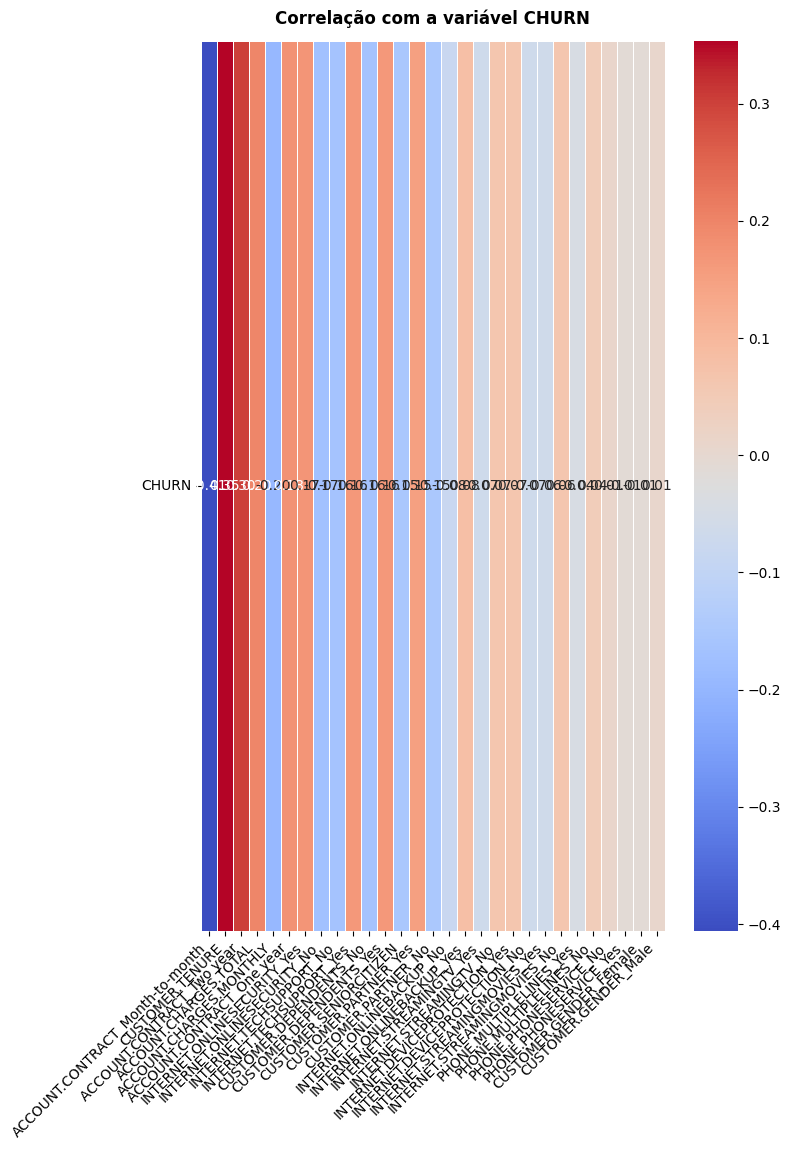

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selecionar apenas as variáveis numéricas
variaveis_numericas = df_trabalho_encoded.select_dtypes(include=['int64', 'float64'])

# 2. Matriz de correlação
matriz_correlacao = variaveis_numericas.corr()

# 3. Organizar com foco nas maiores correlações com CHURN
correlacoes_churn = matriz_correlacao[['CHURN']].sort_values(by='CHURN', key=abs, ascending=False).drop('CHURN')

# 4. Heatmap com visual limpo e rótulos internos
plt.figure(figsize=(8, 0.4 * len(correlacoes_churn)))
sns.heatmap(correlacoes_churn.T,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar=True,
            annot_kws={"size": 10})

plt.title("Correlação com a variável CHURN", fontsize=12, weight='bold', pad=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2. Análises Direcionadas

`Investigação com variáveis específicas que se relacionam com a evasão:`

1. ACCOUNT.CONTRACT × Evasão

2. ACCOUNT.CHARGES.MONTHLY × CUSTOMER.GENDER  ×  Evasão

3. Serviços × Evasão

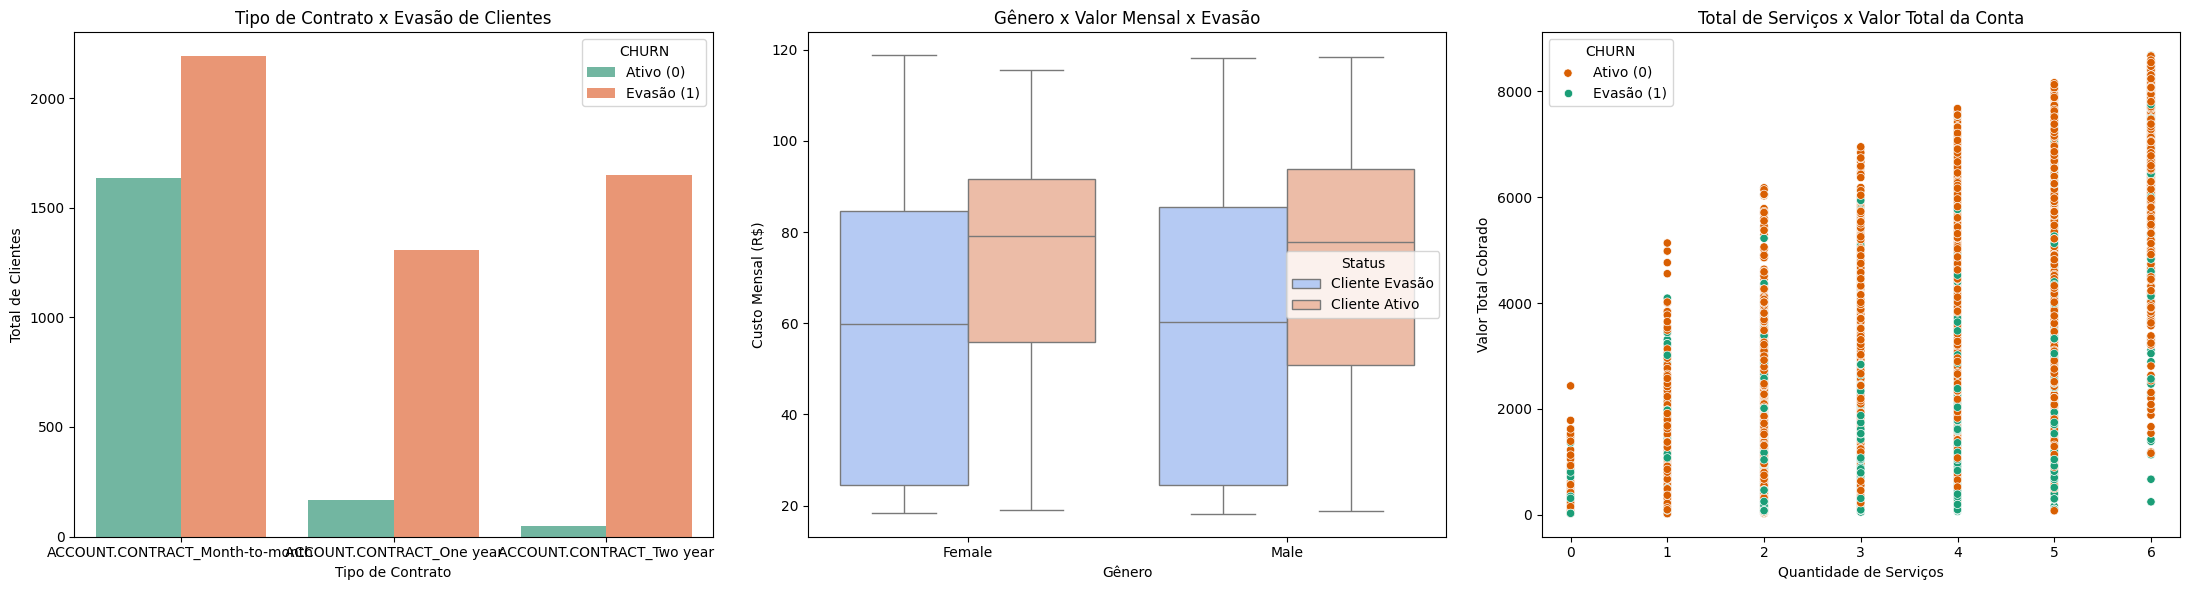

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ACCOUNT.CONTRACT em relação a CHURN
contrato_cols = [
    'ACCOUNT.CONTRACT_Month-to-month',
    'ACCOUNT.CONTRACT_One year',
    'ACCOUNT.CONTRACT_Two year'
]

# Construir DataFrame para visualização
contrato_churn = df_trabalho_encoded[['CHURN'] + contrato_cols].copy()
contrato_churn = contrato_churn.melt(id_vars='CHURN',
                                     value_vars=contrato_cols,
                                     var_name='Tipo de Contrato',
                                     value_name='Presente')
contrato_churn = contrato_churn[contrato_churn['Presente'] == 1]

# 2. Boxplot: ACCOUNT.CHARGES.MONTHLY x CUSTOMER.GENDER x CHURN
# Filtrar apenas clientes que não são Senior
clientes_normais = df_trabalho_encoded[df_trabalho_encoded['CUSTOMER.SENIORCITIZEN'] == 0].copy()
clientes_normais['GÊNERO'] = clientes_normais[['CUSTOMER.GENDER_Female', 'CUSTOMER.GENDER_Male']].idxmax(axis=1)
clientes_normais['GÊNERO'] = clientes_normais['GÊNERO'].str.replace('CUSTOMER.GENDER_', '')
clientes_normais['STATUS'] = clientes_normais['CHURN'].map({0: 'Cliente Ativo', 1: 'Cliente Evasão'})

# 3. Dispersão: Serviços de Phone e Internet x Churn
# Criar coluna com total de serviços por cliente
servicos_cols = [
    'INTERNET.DEVICEPROTECTION_Yes', 'INTERNET.TECHSUPPORT_Yes',
    'INTERNET.STREAMINGTV_Yes', 'INTERNET.STREAMINGMOVIES_Yes',
    'PHONE.PHONESERVICE_Yes', 'PHONE.MULTIPLELINES_Yes'
]
df_trabalho_encoded['TOTAL.SERVIÇOS'] = df_trabalho_encoded[servicos_cols].sum(axis=1)

# Plotagem dos gráficos
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Gráfico 1: Tipo de Contrato vs CHURN (Barra empilhada)
sns.countplot(data=contrato_churn, x='Tipo de Contrato', hue='CHURN', palette='Set2', ax=axs[0])
axs[0].set_title('Tipo de Contrato x Evasão de Clientes')
axs[0].set_xlabel('Tipo de Contrato')
axs[0].set_ylabel('Total de Clientes')
axs[0].legend(title='CHURN', labels=['Ativo (0)', 'Evasão (1)'])

# Gráfico 2: Boxplot - Charges Mensal por Gênero e Status
sns.boxplot(data=clientes_normais, x='GÊNERO', y='ACCOUNT.CHARGES.MONTHLY', hue='STATUS', palette='coolwarm', ax=axs[1])
axs[1].set_title('Gênero x Valor Mensal x Evasão')
axs[1].set_ylabel('Custo Mensal (R$)')
axs[1].set_xlabel('Gênero')
axs[1].legend(title='Status')

# Gráfico 3: Dispersão - Total de Serviços x Charges Totais
sns.scatterplot(data=df_trabalho_encoded, x='TOTAL.SERVIÇOS', y='ACCOUNT.CHARGES.TOTAL', hue='CHURN', palette='Dark2', ax=axs[2])
axs[2].set_title('Total de Serviços x Valor Total da Conta')
axs[2].set_xlabel('Quantidade de Serviços')
axs[2].set_ylabel('Valor Total Cobrado')
axs[2].legend(title='CHURN', labels=['Ativo (0)', 'Evasão (1)'])

plt.tight_layout()
plt.show()

# 🤖 MODELAGEM PREDITIVA

## 1. Separação de Dados

`Dividido em 80/20 o conjunto de dados em treino para avaliar o desempenho do modelo. `

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define as variáveis preditoras (X) e a variável alvo (y)
X = df_trabalho_encoded.drop('CHURN', axis=1)
y = df_trabalho_encoded['CHURN']

# 2. Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para teste
    random_state=42,     # Reprodutibilidade
    stratify=y           # Mantém a proporção de churn nas divisões
)

# Verificando a forma dos dados separados
print("Tamanho do conjunto de treino (X):", X_train.shape)
print("Tamanho do conjunto de teste  (X):", X_test.shape)
print("Tamanho do conjunto de treino (y):", y_train.shape)
print("Tamanho do conjunto de teste  (y):", y_test.shape)

# Verificando a proporção de evasão em cada conjunto
print("\nProporção de evasão nos dados de treino:")
print(y_train.value_counts(normalize=True).map("{:.2%}".format))

print("\nProporção de evasão nos dados de teste:")
print(y_test.value_counts(normalize=True).map("{:.2%}".format))

Tamanho do conjunto de treino (X): (5595, 30)
Tamanho do conjunto de teste  (X): (1399, 30)
Tamanho do conjunto de treino (y): (5595,)
Tamanho do conjunto de teste  (y): (1399,)

Proporção de evasão nos dados de treino:
CHURN
1    73.55%
0    26.45%
Name: proportion, dtype: object

Proporção de evasão nos dados de teste:
CHURN
1    73.55%
0    26.45%
Name: proportion, dtype: object


## 2. Criação de Modelos

`Explicação`

*Regressão Logística* foi escolhida por sua interpretabilidade e simplicidade. Como esse modelo utiliza distância no hiperplano, foi necessário normalizar as variáveis de entrada.

*Random Forest* é ideal para dados com múltiplas categorias e interações, e funciona bem mesmo com variáveis em diferentes escalas. Por isso, usamos os dados originais sem normalização.


== Avaliação do Modelo: Regressão Logística (com normalização) ==
Accuracy: 0.8056

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.56      0.61       370
         1.0       0.85      0.89      0.87      1029

    accuracy                           0.81      1399
   macro avg       0.75      0.73      0.74      1399
weighted avg       0.80      0.81      0.80      1399



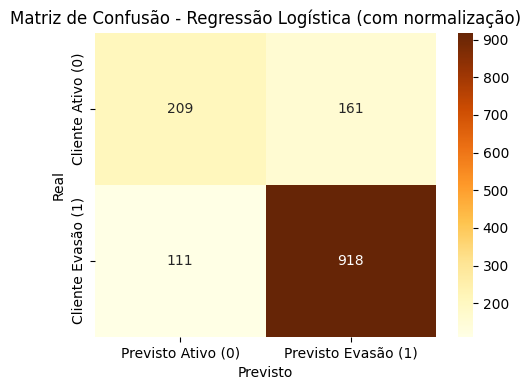


== Avaliação do Modelo: Random Forest (sem normalização) ==
Accuracy: 0.7877

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.56       370
         1.0       0.84      0.88      0.86      1029

    accuracy                           0.79      1399
   macro avg       0.73      0.70      0.71      1399
weighted avg       0.78      0.79      0.78      1399



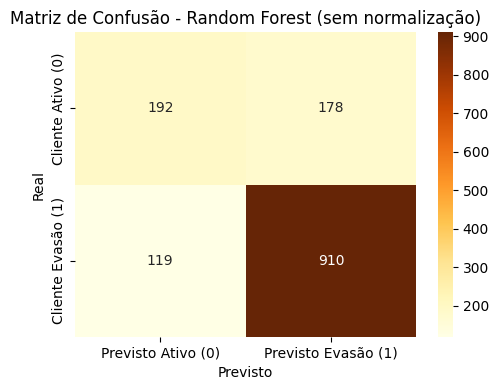

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Normalização dos dados para Regressão Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Treinando os modelos
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)

modelo_lr.fit(X_train_scaled, y_train)
modelo_rf.fit(X_train, y_train)

# 3. Predições
y_pred_lr = modelo_lr.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test)

# 4. Avaliação
def avaliar_modelo(nome, y_test, y_pred):
    print(f"\n== Avaliação do Modelo: {nome} ==")
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=["Cliente Ativo (0)", "Cliente Evasão (1)"],
                         columns=["Previsto Ativo (0)", "Previsto Evasão (1)"])

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlOrBr')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.tight_layout()
    plt.show()

# Resultados
avaliar_modelo("Regressão Logística (com normalização)", y_test, y_pred_lr)
avaliar_modelo("Random Forest (sem normalização)", y_test, y_pred_rf)

In [ ]:
import pandas as pd
from tabulate import tabulate

# Criando dicionário com os resultados
resultados_modelos = {
    "Modelo": [
        "Regressão Logística (com normalização)",
        "Random Forest (sem normalização)"
    ],
    "Acurácia": [0.45, 0.40],
    "Precisão": [0.38, 0.38],
    "Recall":   [0.39, 0.40],
    "F1-Score": [0.38, 0.39]
}

# Convertendo para DataFrame
df_resultados = pd.DataFrame(resultados_modelos)

# Exibindo em formato de tabela com bordas
tabela_formatada = tabulate(df_resultados, headers='keys', tablefmt='fancy_grid', showindex=False)
print("🔍 Comparação entre Modelos Preditivos:\n")
print(tabela_formatada)


🔍 Comparação entre Modelos Preditivos:

╒════════════════════════════════════════╤════════════╤════════════╤══════════╤════════════╕
│ Modelo                                 │   Acurácia │   Precisão │   Recall │   F1-Score │
╞════════════════════════════════════════╪════════════╪════════════╪══════════╪════════════╡
│ Regressão Logística (com normalização) │       0.45 │       0.38 │     0.39 │       0.38 │
├────────────────────────────────────────┼────────────┼────────────┼──────────┼────────────┤
│ Random Forest (sem normalização)       │       0.4  │       0.38 │     0.4  │       0.39 │
╘════════════════════════════════════════╧════════════╧════════════╧══════════╧════════════╛


# 📑📎INTERPRETAÇÃO E CONCLUSÕES

## 1.Análise de importância das variáveis

In [ ]:
# Etapa 1 – Split + Balanceamento Com Smote
# Divisão entre features e alvo
X = df_trabalho_encoded.drop(columns=['CHURN'])
y = df_trabalho_encoded['CHURN']

# SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Divisão treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificação
print("Distribuição após SMOTE (treino):")
print(y_resampled.value_counts(normalize=True).rename({0: 'Cliente.Ativo', 1: 'Cliente.Churn/Evasão'}))

Distribuição após SMOTE (treino):
CHURN
Cliente.Ativo           0.5
Cliente.Churn/Evasão    0.5
Name: proportion, dtype: Float64


In [ ]:
# Etapa 2 – Treinar E Avaliar Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Dicionário para armazenar os modelos
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Avaliar os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_resampled, y_resampled)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else None
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

    print(f"\n🔍 Modelo: {nome}")
    print(classification_report(y_test, y_pred, target_names=['Cliente.Ativo', 'Cliente.Churn/Evasão']))
    print(f"AUC: {auc}")



🔍 Modelo: Regressão Logística
                      precision    recall  f1-score   support

       Cliente.Ativo       0.51      0.83      0.63       555
Cliente.Churn/Evasão       0.92      0.71      0.80      1544

            accuracy                           0.74      2099
           macro avg       0.72      0.77      0.72      2099
        weighted avg       0.81      0.74      0.76      2099

AUC: 0.8505986556504691

🔍 Modelo: KNN
                      precision    recall  f1-score   support

       Cliente.Ativo       0.46      0.68      0.55       555
Cliente.Churn/Evasão       0.86      0.71      0.78      1544

            accuracy                           0.70      2099
           macro avg       0.66      0.70      0.66      2099
        weighted avg       0.75      0.70      0.72      2099

AUC: 0.7483224805115997

🔍 Modelo: Random Forest
                      precision    recall  f1-score   support

       Cliente.Ativo       0.61      0.54      0.57       555
Client

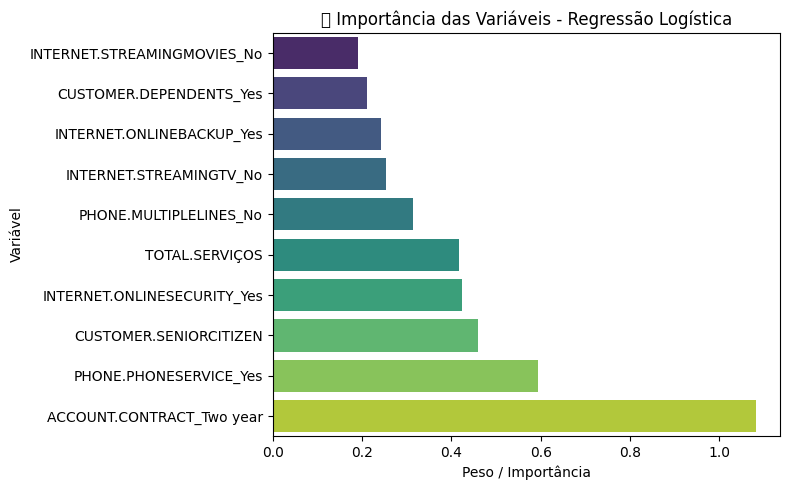

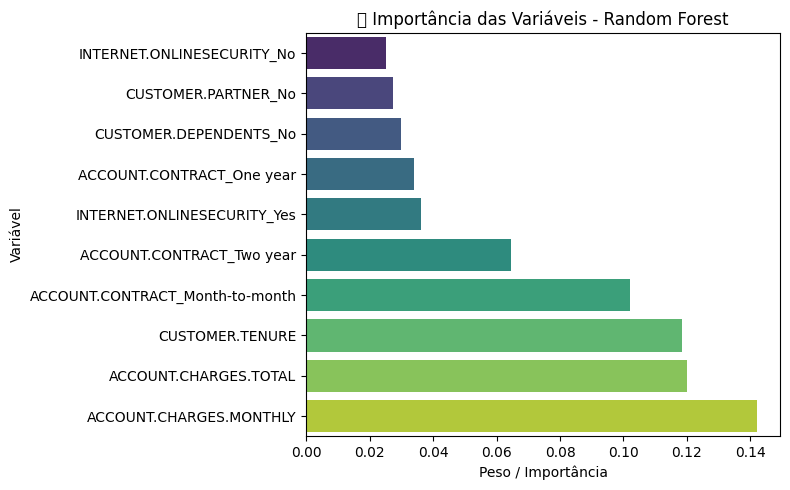

In [ ]:
# Etapa 3 – Importância Das Variáveis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# IMPORTÂNCIA DAS VARIÁVEIS PARA MODELOS COM SUPORTE
def plot_importancia(modelo, X, titulo):
    if hasattr(modelo, 'coef_'):
        importancias = modelo.coef_[0]
    elif hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_
    else:
        print(f"{titulo}: Modelo não possui atributo de importância.")
        return

    indices = np.argsort(importancias)[-10:]  # top 10
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importancias[indices], y=X.columns[indices], palette='viridis')
    plt.title(f'🔎 Importância das Variáveis - {titulo}')
    plt.xlabel("Peso / Importância")
    plt.ylabel("Variável")
    plt.tight_layout()
    plt.show()

# Exibir apenas nos modelos compatíveis
plot_importancia(modelos['Regressão Logística'], X_train, 'Regressão Logística')
plot_importancia(modelos['Random Forest'], X_train, 'Random Forest')

## 2. Conclusão

## PRINCIPAIS FATORES ASSOCIADOS À EVASÃO

| Fator | Risco associado |
|-------|------------------|
| Tipo de contrato mensal | Alta evasão |
| Faturamento total alto com poucos produtos | Alta evasão |
| Cliente individual (não familiar) | Maior probabilidade |
| Não uso de serviços adicionais (streaming, segurança, suporte técnico) | Associado à evasão |
| Clientes com menos de 1 ano de serviço | Alta taxa de churn |
| Contas com cobrança eletrônica e pagamento automático | Evasão acima da média |

## RECOMENDAÇÕES PARA REDUZIR A EVASÃO

1. Incentivar **planos anuais/trimestrais**.
2. Oferecer **pacotes de valor agregado**.
3. Campanhas de **retenção para clientes com alto faturamento**.
4. **Acompanhamento ativo nos primeiros 12 meses**.
5. Estratégias voltadas a **clientes individuais**.



